In [38]:
import numpy as np
import pandas as pd

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

# Visualization

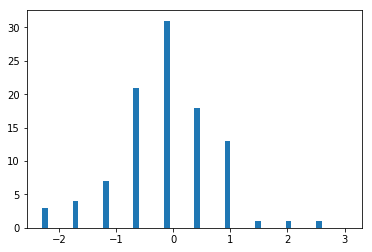

In [2]:
# 直方圖
normal_samples = np.random.normal(size=100) # 生成 100 組標準常態分配（平均值為 0，標準差為 1 的常態分配）隨機變數
plt.hist(normal_samples, width=0.1)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013926F60>]],
      dtype=object)

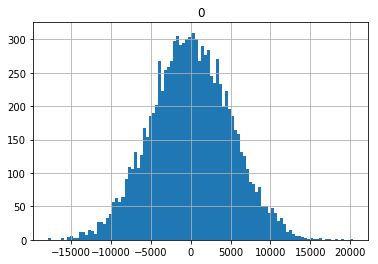

In [46]:
samples = np.random.randn(10000)*5000 # 生成 100 組標準常態分配（平均值為 0，標準差為 1 的常態分配）隨機變數
pd.DataFrame(samples).hist(bins = 100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014C5FBA8>,
      dtype=object)

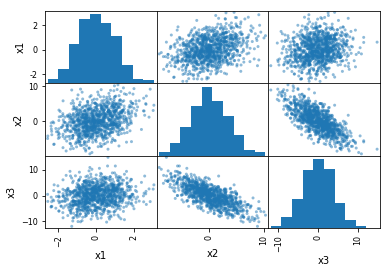

In [5]:
# 各變數之

np.random.seed(134)                     
N = 1000                              
 
x1 = np.random.normal(0, 1, N)                        
x2 = x1 + np.random.normal(0, 3, N)              
x3 = 2 * x1 - x2 + np.random.normal(0, 2, N)

df = pd.DataFrame({'x1':x1,
                   'x2':x2,
                   'x3':x3})

df.head()

pd.plotting.scatter_matrix(df) #, alpha=0.2 ,hist_kwds={'bins':30} ,diagonal='kde'

# Pandas

### 讀檔案

In [ ]:
data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

In [ ]:
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

In [ ]:
#依字元切割字串為list
data_split = data.split(",")

### 描述性統計

In [ ]:
df[object_features].mean()
df[object_features].max()

In [ ]:
# 各特徵之，樣本之相異值
df[object_features].nunique()

In [ ]:
#檢視資料中各個欄位類型的數量
app_train.dtypes.value_counts()

In [ ]:
#檢視資料中各"類別型欄位"類別(相異值)數量 ：百日馬拉松 -> Day 6
app_train.select_dtypes(include=["object"]).apply(pd.Series.nunique, axis = 0)

### 極端值/離群值 處理

In [ ]:
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

### DataFrame 處理

In [ ]:
#移除欄位
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)

In [ ]:
#合併df
df = pd.concat([df_train,df_test])

In [ ]:
# 秀出資料欄位的類型, 與對應的數量
# df.dtypes : 轉成以欄位為 index, 類別(type)為 value 的 DataFrame
# .reset_index() : 預設是將原本的 index 轉成一個新的欄位, 如果不須保留 index, 則通常會寫成 .reset_index(drop=True)
dtype_df = df.dtypes.reset_index() 
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

將 int, float object形態特徵抽出存於三個 list 中
：百日馬拉松 -> Day 7

In [ ]:
# 確定只有 int64, float64, object 三種類型後對欄位名稱執行迴圈, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
# .dtypes(欄位類型), .columns(欄位名稱) 是 DataFrame 提供的兩個方法, 這裡順便展示一下 for 與 zip 搭配的用法
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
# 這邊採用的寫法稱為 f-string, 是 Python 3.6.2 以後版本才出現的
# 如果無法執行, 則需要更新到這個版本之後, 或自行將程式改寫為 str.format 形式
# 改寫方式可以參考 https://blog.louie.lu/2017/08/08/outdate-python-string-format-and-fstring/
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

# Feature Engineering

In [3]:
#將左偏或右偏的數據轉成常態分布
train_Y = np.log1p(df_train['SalePrice'])

NameError: name 'df_train' is not defined

### Rescale

### scale零均值單位方差

In [67]:
from sklearn import preprocessing   
X = np.random.randint(10,size=(4,3))
X_scaled = preprocessing.scale(X)   

#scaled之後的數據零均值，單位方差  
print(X_scaled.mean(axis=0))  # column mean: array([ 0.,  0.,  0.])    
print(X_scaled.std(axis=0))  #column standard deviation: array([ 1.,  1.,  1.])  

[5.55111512e-17 0.00000000e+00 0.00000000e+00]
[1. 1. 1.]


### StandardScaler
使用該類的好處在於可以保存訓練集中的參數（均值、方差）直接使用其對象轉換測試集數據

In [75]:
scaler = preprocessing.StandardScaler().fit(X) #out: StandardScaler(copy=True, with_mean=True, with_std=True) 
print(np.mean(scaler.transform(X),axis=0))
print(np.std(scaler.transform(X),axis=0))

[5.55111512e-17 0.00000000e+00 0.00000000e+00]
[1. 1. 1.]


In [81]:
scaler.transform([[-2., 10, 5]])

array([[-2.41684122,  1.21739529,  2.50185117]])

### MinMaxScaler：歸一到[ 0，1 ] 

In [ ]:
from sklearn import preprocessing
import numpy as np
 
x = np.array([[3., -1., 2., 613.],
              [2., 0., 0., 232],
              [0., 1., -1., 113],
              [1., 2., -3., 489]])
 
min_max_scaler = preprocessing.MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(x)

### MaxAbsScaler：歸一到[ -1，1 ] 

In [65]:
from sklearn import preprocessing
import numpy as np
 
x = np.array([[3., -1., 2., 613.],
              [2., 0., 0., 232],
              [0., 1., -1., 113],
              [1., 2., -3., 489]])
max_abs_scaler = preprocessing.MaxAbsScaler()
x_train_maxsbs = max_abs_scaler.fit_transform(x)

### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

### One Hot encoding

In [ ]:
sub_train = pd.get_dummies(sub_train) #針對 object(string)資料型態, 若為int就無作用

# Pandas

### 最小值 / 最大值

In [ ]:
min(x) #x.min() #np.min(x)

### 眾數 Mode

In [ ]:
# 得眾數方法1
mode_goods_price = list(app_train['AMT_GOODS_PRICE'].value_counts().index)[0]

# 得眾數方法2
mode = mode(app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE']).mode

### 分位數 Quantile

In [ ]:
np.percentile(x, q = 50) #中位數

five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in five_num]
print(quantile_5s)

# Numpy

# numpy.random

### 1 numpy.random.rand()
- rand函數根據給定維度生成0~1之間的數據，包含0，不包含1
- 返回值為指定維度的array

In [4]:
np.random.rand()

0.29833489920790246

In [6]:
np.random.rand(3)

array([0.83426173, 0.80113358, 0.09067198])

In [7]:
np.random.rand(3,2,2)

array([[[0.94101844, 0.09886182],
        [0.55377357, 0.65363942]],

       [[0.99189967, 0.16697407],
        [0.36050688, 0.55395457]],

       [[0.20681492, 0.65607441],
        [0.48224951, 0.23230611]]])

### 2 numpy.random.randn()
- randn函數返回一個或一組樣本，具有標準正態分佈。
- 標準正態分佈又稱為u分佈，是以0為均值、以1為標準差的正態分佈，記為N（0，1）。
- 返回值為指定維度的array

In [8]:
np.random.randn() 

-0.3732062114879008

In [9]:
np.random.randn(2,4)

array([[ 2.28072975,  2.30901674, -1.15361177,  0.78685489],
       [ 0.41964376, -1.23592267,  0.76274602, -0.64361213]])

### 3 numpy.random.randint()
- numpy.random.randint(low, high=None, size=None, dtype='l')
- 返回隨機整數，範圍區間為low~high，包含low，不包含high
- 參數：low為最小值，high為最大值，size為數組維度大小，dtype為數據類型，默認的數據類型是np.int
- high沒有填寫時，默認生成隨機數的範圍是0~low

In [10]:
np.random.randint(1,size=5) # 返回[0,1)之间的整数，所以只有0

array([0, 0, 0, 0, 0])

In [11]:
np.random.randint(1,5) # 返回1个[1,5)时间的随机整数

2

In [13]:
np.random.randint(-5,5,size=(2,2))

array([[-1, -3],
       [ 2,  4]])

### 4 numpy.random.choice()
- numpy.random.choice(a, size=None, replace=True, p=None)
- 從給定的一維數組中生成隨機數
- 參數： a為一維數組類似數據或整數；size為數組維度；p為數組中的數據出現的概率
- a為整數時，對應的一維數組為np.arange(a)

In [14]:
np.random.choice(5,3)

array([2, 2, 3])

In [23]:
np.random.choice(5, 3, replace=False)
# 当replace为False时，生成的随机数不能有重复的数值

array([2, 0, 3])

In [24]:
np.random.choice(5,size=(3,2))

array([[3, 3],
       [4, 4],
       [4, 1]])

In [25]:
demo_list = ['lenovo', 'sansumg','moto','xiaomi', 'iphone']
np.random.choice(demo_list,size=(3,3))

array([['moto', 'moto', 'xiaomi'],
       ['moto', 'lenovo', 'moto'],
       ['iphone', 'xiaomi', 'lenovo']], dtype='<U7')

- 參數p的長度與參數a的長度需要一致；
- 參數p為概率，p裡的數據之和應為1

In [35]:
demo_list = ['lenovo', 'sansumg','moto','xiaomi', 'iphone']
np.random.choice(demo_list,size=(3,3), p=[0.1,0.6,0.1,0.1,0.1])

array([['lenovo', 'moto', 'sansumg'],
       ['xiaomi', 'sansumg', 'xiaomi'],
       ['lenovo', 'xiaomi', 'sansumg']], dtype='<U7')

### 6 numpy.random.seed()
- np.random.seed()的作用：使得隨機數據可預測。
- 當我們設置相同的seed，每次生成的隨機數相同。如果不設置seed，則每次會生成不同的隨機數

# 常見錯誤

In [ ]:
ValueError: max must be larger than min in range parameter
代表資料含有NaN值

df = df['column_name'].apply(pd.to_numeric)

df = df['column_name'].replace(np.nan, your_value)

ax.hist(s.dropna(), alpha=0.9, color='blue')

In [ ]:
#Series's select
df['1stFlrSF'][50:100]

# Print

In [ ]:
for x in range(0, 5):
    print(x, end=',')
#0,1,2,3,4,

In [ ]:
         %5d     右對齊，不足左邊補空格
        %-5d     代表左對齊，不足右邊默認補空格
        %05d     右對齊，不足左邊補0

In [13]:
print ('我叫%s, 身高%5dcm' % ('Enzo',184))

我叫Enzo, 身高  184cm


In [30]:
PI=3.1415926
print('%.5f' % (PI))

3.14159


In [ ]:
%.2f--- 保留小數點後2 位            '%4.8f' 4 代表整個浮點數的長度

In [ ]:
print('姓名是 {}，年龄是 {}'.format('Tom',20))

print('姓名是:{1}，年龄是:{0}'.format(20,'Tom'))

print('姓名是:{name}，年龄是:{age}'.format(name='Tom',age=20))

name = Ada
age = 20
print('Name is {name},age is {age}'.format(name=name,age=age))
 
#姓名是:Tom，年龄是:20

In [ ]:

#姓名是:Tom，年龄是:20

# 科學記號Display Format

##  Pandas Display Format

In [1]:
取消浮點數變科學記號表示法
pd.options.display.float_format = '{:.2f}'.format

NameError: name '取消浮點數變科學記號表示法' is not defined

In [ ]:
顯示到小數點後兩位
app_train['AMT_INCOME_TOTAL'].describe().apply("{0:.2f}".format)

##  Numpy Display Format

In [ ]:
print([ "{:0.2f}".format(x) for x in X_scaled.mean(axis=0)  ])